# Simple Operations with Qiskit

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile#, quantum_info as qi
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator

## Qubit Examples

Probability vector representation

In [2]:
q0 = np.array([[1], [0]])
q0

array([[1],
       [0]])

Bloch sphere visualization:

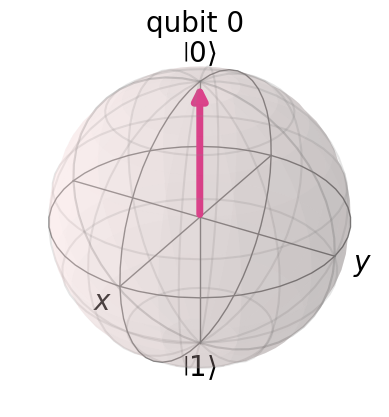

In [3]:
state = Statevector(q0)
state.draw('bloch')

Dirac notation:

In [4]:
state.draw('latex')

<IPython.core.display.Latex object>

In [5]:
state.probabilities() * 100

array([100.,   0.])

### Creating a Circuit

Simple Hadamard gate to bring qubit into superposition:

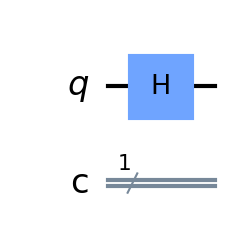

In [6]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.draw('mpl', scale=1.5)

Applying circuit to original state and visualizing again:

In [7]:
state = state.evolve(circuit)

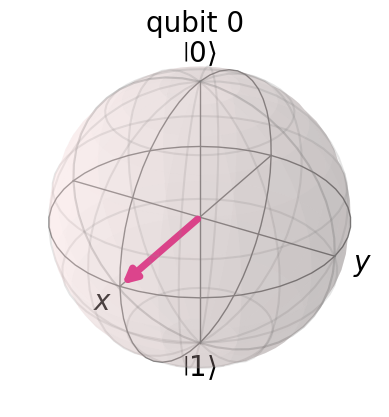

In [8]:
state.draw('bloch')

In [9]:
state.draw('latex')

<IPython.core.display.Latex object>

In [10]:
state.probabilities() * 100

array([50., 50.])

### Running the Circuit

First we add a measurement to the circuit, observing the qubit (recall what happens when we do this to a qubit in a superposition state!)

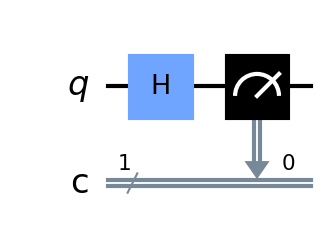

In [11]:
circuit.measure(0, 0)
circuit.draw('mpl', scale=1.5)

Now we run the circuit locally on a **simulator**. To demonstrate the distribution of results (probabilities), we run the circuit and record results 4,000 times:

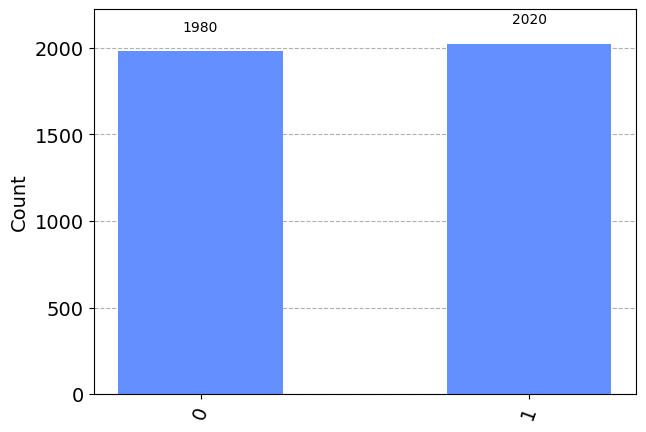

In [12]:
sim_backend = Aer.get_backend('qasm_simulator')

job = sim_backend.run(transpile(circuit, sim_backend), shots=4000)
result = job.result()

counts = result.get_counts()

plot_histogram(counts)

## 2 Qubit Examples

Now let's look at working with a 2-qubit system. We first create another qubit and represent the combined state by taking the tensor product

$$
|0\rangle \otimes |0\rangle =
\begin{bmatrix}
    1\\
    0
\end{bmatrix}
\otimes
\begin{bmatrix}
    1\\
    0
\end{bmatrix}
=
\begin{bmatrix}
    1\\
    0\\
    0\\
    0
\end{bmatrix}
= |00\rangle
$$

In [13]:
q1 = np.array([[1], [0]])

In [14]:
combined_state = np.kron(q0, q1)
combined_state

array([[1],
       [0],
       [0],
       [0]])

We can still visualize this state in the same way

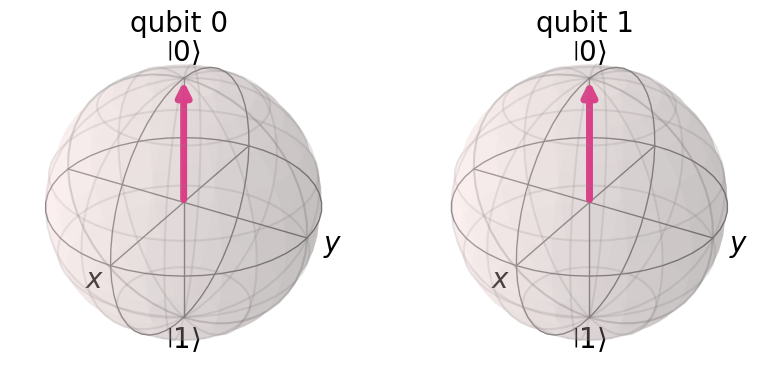

In [15]:
combined_vec = Statevector(combined_state)
combined_vec.draw('bloch')

In [16]:
combined_vec.draw('latex')

<IPython.core.display.Latex object>

### The Circuit

First, we'll look at what happens when we bring our two qubits into superposition individually.

Then we'll entangle our qubits using a Hadamard gate and a CNOT gate.

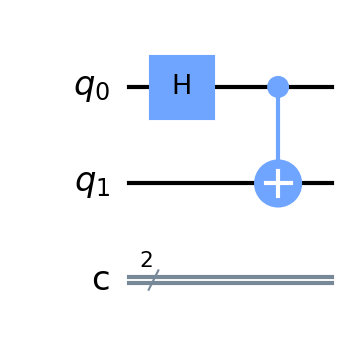

In [17]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
# circuit.h(1)
circuit.cnot(0, 1)
circuit.draw('mpl', scale=1.5)

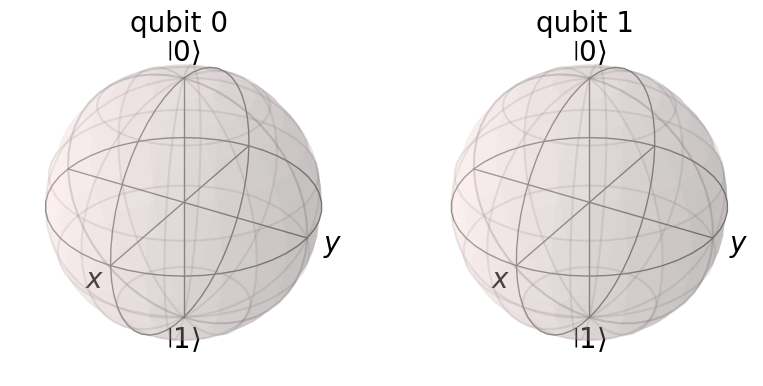

In [18]:
combined_vec = combined_vec.evolve(circuit)
combined_vec.draw('bloch')

In [19]:
combined_vec.probabilities() * 100

array([50.,  0.,  0., 50.])

In [20]:
combined_vec.draw('latex')

<IPython.core.display.Latex object>

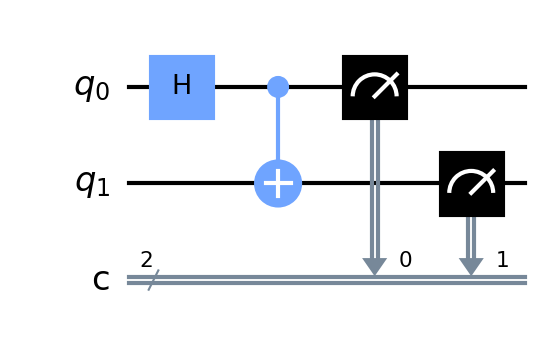

In [21]:
circuit.measure((0, 1), (0, 1))
circuit.draw('mpl', scale=1.5)

### Running on the Simulator

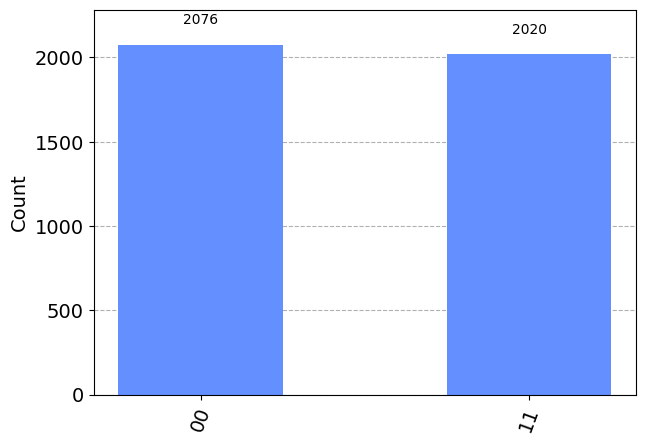

In [22]:
sim_backend = Aer.get_backend('qasm_simulator')

job = sim_backend.run(transpile(circuit, sim_backend), shots=4096)
result = job.result()

counts = result.get_counts()

plot_histogram(counts)